# **Demostración GCN**

*   NRC: 41359
*   Grupo: 05-1pm
* Por Andrey Solano, Wilson Umaña y Allan Rivera

  > La base de la demostración está basada del siguiente repositorio https://colab.research.google.com/drive/1ZugveUjRrbSNwUbryeKJN2wyhGFRCw0q, que corresponde al cuaderno de la página https://mlabonne.github.io/blog/intrognn/, del cuál se obtuvo la GCN y su entrenamiento, el apartado "Nuestro aporte" corresponde a lo que se realizó con ayuda de inteligencia artificial.

  > Para tener una buena comprensión del código basado, se complementó la información recabada en la investigación con la documentación para cada librería, además, del siguiente prompt que contribuyó también contribuyó al análisis.

  > `prompt: Fully based on the PyTorch documentation, briefly explain the main structure of this snippet of code`

 1. Integración de Librerías Necesarias

-  `torch`: Crear y entrenar NN

- `numpy`: Operaciones numéricas

- `networkx`: Trabajar Grafos y Redes

- `matplotlib.pyplot`: Crear Gráficas

- `to_networkx`: Convierte datos de Pytorch Geometric a un grafo de NetworkX

- `HTML`: Mostrar contenido HTML en el cuaderno

- `animation`: Crear animaciones de gráficas

In [70]:
!pip -q install torch_geometric # Instalación de la librería al entorno

import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
from IPython.display import HTML
from matplotlib import animation

2. Obtención del Dataset
> El dataset `KarateClub` proviene de la librería `torch_geometric`, donde se pueden encontrar gran cantidad de dataset. Se decidió seguir trabajando con este debido a su tamaño compacto y su poca cantidad de conexiones. Otros datasets como Citesser o Cora eran bastante grandes y no se apreciaba bien la clasificación de nodos.

  En esta parte se puede apreciar diferentes características propias del dataset por medio de los métodos:
  - `num_nodes:` Número de nodos
  - `num_edges`: Número de aristas
  - `num_classes`: Número de etiquetas
  - `has_self_loops`: Contiene lazos
  - `data.x`: Contiene las features de los nodos, normalmente es un tensor (estructura de datos multidimensional). En este caso solo es el grupo al que pertenecen. En otros contextos podría aparecer datos como edad, nivel académico, salario, género, etc.
  - `data.y`: Contiene las etiquetas relacionadas a los nodos

In [71]:
from torch_geometric.datasets import KarateClub

# Obtener el Dataset de torch_geometric
dataset = KarateClub()
data = dataset[0]

# Mostrar información del Dataset
print(dataset)
print('------------')
print(f'Número de Grafos: {len(dataset)}')
print(f'Número de Nodos: {data.num_nodes}')
print(f'Número de Aristas: {data.num_edges}')
print(f'Número de Clases/Etiquetas: {dataset.num_classes}')

KarateClub()
------------
Número de Grafos: 1
Número de Nodos: 34
Número de Aristas: 156
Número de Clases/Etiquetas: 4


In [72]:
# Información Adicional
print('------------')
print(f'Tiene lazos: {data.has_self_loops()}')
print(f'Hay Nodos Aislados: {data.has_isolated_nodes()}')
print(f'Es No Dirigido: {data.is_undirected()}')

------------
Tiene lazos: False
Hay Nodos Aislados: False
Es No Dirigido: True


In [73]:
print('------------')
print(f'Features: {data.x}')
print(f'Etiquetas Relacionadas a nodos: {data.y}')

------------
Features: tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])
Etiquetas Relacionadas a nodos: tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])


3. Establecer la Red Convolucional

  La estructura de este modelo GCN se desglosa en tres aspectos importantes:

  1. **Capa GCN**: Realiza la convolución a través del grafo. Toma como entrada las características de los nodos (`dataset.num_features`) y sus vecinos (`edge_index`), y las transforma a un espacio de 3 dimensiones. Luego, aplica una activación ReLU para introducir no linealidad, lo que facilita el aprendizaje de relaciones entre nodos.

  2. **Capa Lineal**: La salida de la capa GCN pasa por una capa lineal (`Linear`), que ajusta las características a un vector del tamaño correspondiente al número de clases (`dataset.num_classes`). Esto ayuda a convertir las representaciones de los nodos en las predicciones finales de clase.

  3. **Método `forward`**: Define cómo se realiza la Propagación hacia Adelante del modelo. Primero, las características de los nodos y sus conexiones se procesan a través de la capa GCN, luego se aplica una activación ReLU, y la salida resultante se pasa por la capa lineal para obtener las predicciones finales de clase. El método retorna tanto las representaciones intermedias de los nodos (`h`) como las predicciones finales (`z`).




In [74]:
# prompt: fully based on pytorch documentation, explain briefly its configuration

from torch.nn import Linear
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, dataset):
        super().__init__()
        # Capa GCN: Transforma las características de entrada en 3 dimensiones
        self.gcn = GCNConv(dataset.num_features, 3)
        # Capa Lineal: Ajusta la salida de la GCN para que tenga el tamaño del número de clases
        self.out = Linear(3, dataset.num_classes)

    def forward(self, x, edge_index):
        # Propagación hacia adelante: Aplica la capa GCN seguida de una activación ReLU
        h = self.gcn(x, edge_index).relu()
        # Pasa la salida de la GCN a través de la capa lineal para obtener las predicciones finales
        z = self.out(h)
        # Retorna las representaciones internas (h) y las predicciones finales (z)
        return h, z

model = GCN(dataset)
print(model)

GCN(
  (gcn): GCNConv(34, 3)
  (out): Linear(in_features=3, out_features=4, bias=True)
)


4. Establecer Entrenamiento

  Criterio y Optimizador

  - `CrossEntropyLoss`: Es la función de pérdida, es decir, es la diferencia entre las predicciones del modelo y las etiquetas verdaderas.
  - `Adam`: Optimiza los parámetros del modelo con una tasa de aprendizaje de 0.02

In [75]:
criterion = torch.nn.CrossEntropyLoss() # Función de pérdida
optimizer = torch.optim.Adam(model.parameters(), lr=0.02) # Optimizador

  Cálculo Precisión
  - Se calcula el porcentaje de precisión, esto comparando la cantidad de clases predichas (`pred_y`) con las etiquetas reales (`y`)

In [76]:
def accuracy(pred_y, y):
    return (pred_y == y).sum() / len(y)

Ciclo de Entrenamiento
- El entrenamiento se extiende por 201 iteraciones (`épocas`), en cada una se realiza la propagación hacia adelante, se calcula la pérdida y la precisión, y se ajustan los parámetros del modelo a través de la propagación hacia atrás.

In [77]:
# Datos para Gráficos
losses = []  # Guadar la pérdidaen cada época
accuracies = []  # Guardar la precisión del modelo en cada época
outputs = []  # Guarda las predicciones de la clase en cada época

# Entrenamiento
for epoch in range(201):
    # Limpia los gradientes acumulados de la época anterior
    optimizer.zero_grad()

    # Realiza la Propagación hacia Adelante
    h, z = model(data.x, data.edge_index)

    # Calcula la pérdida
    loss = criterion(z, data.y)

    # Calcula la precisión
    acc = accuracy(z.argmax(dim=1), data.y)

    # Calcula los gradientes para actualizar los pesos del modelo
    loss.backward()

    # Actualiza los parámetros del modelo usando el optimizador
    optimizer.step()

    # Guarda datos
    losses.append(loss)
    accuracies.append(acc)
    outputs.append(z.argmax(dim=1))

    # Imprimir las métricas
    if epoch % 10 == 0:
        print(f'Época {epoch:>3} | Pérdida: {loss:.2f} | Precisión: {acc*100:.2f}%')

Época   0 | Pérdida: 1.45 | Precisión: 14.71%
Época  10 | Pérdida: 1.29 | Precisión: 35.29%
Época  20 | Pérdida: 1.08 | Precisión: 67.65%
Época  30 | Pérdida: 0.87 | Precisión: 73.53%
Época  40 | Pérdida: 0.68 | Precisión: 73.53%
Época  50 | Pérdida: 0.54 | Precisión: 73.53%
Época  60 | Pérdida: 0.45 | Precisión: 73.53%
Época  70 | Pérdida: 0.38 | Precisión: 82.35%
Época  80 | Pérdida: 0.33 | Precisión: 85.29%
Época  90 | Pérdida: 0.30 | Precisión: 85.29%
Época 100 | Pérdida: 0.27 | Precisión: 85.29%
Época 110 | Pérdida: 0.26 | Precisión: 88.24%
Época 120 | Pérdida: 0.24 | Precisión: 88.24%
Época 130 | Pérdida: 0.24 | Precisión: 88.24%
Época 140 | Pérdida: 0.23 | Precisión: 88.24%
Época 150 | Pérdida: 0.22 | Precisión: 88.24%
Época 160 | Pérdida: 0.22 | Precisión: 88.24%
Época 170 | Pérdida: 0.21 | Precisión: 88.24%
Época 180 | Pérdida: 0.21 | Precisión: 88.24%
Época 190 | Pérdida: 0.21 | Precisión: 88.24%
Época 200 | Pérdida: 0.21 | Precisión: 88.24%


# **Nuestro Aporte**

1. Visualización de la Pérdida y Precisión

  Una vez completado el entrenamiento, se procede a graficar la pérdida y la precisión utilizando los datos almacenados en las listas correspondientes. En la figura, se puede observar que la precisión aumenta de manera progresiva a medida que avanzan las épocas, mientras que la pérdida disminuye de forma constante. Esto indica que el modelo está aprendiendo correctamente, mejorando su capacidad de clasificación con el paso del tiempo.

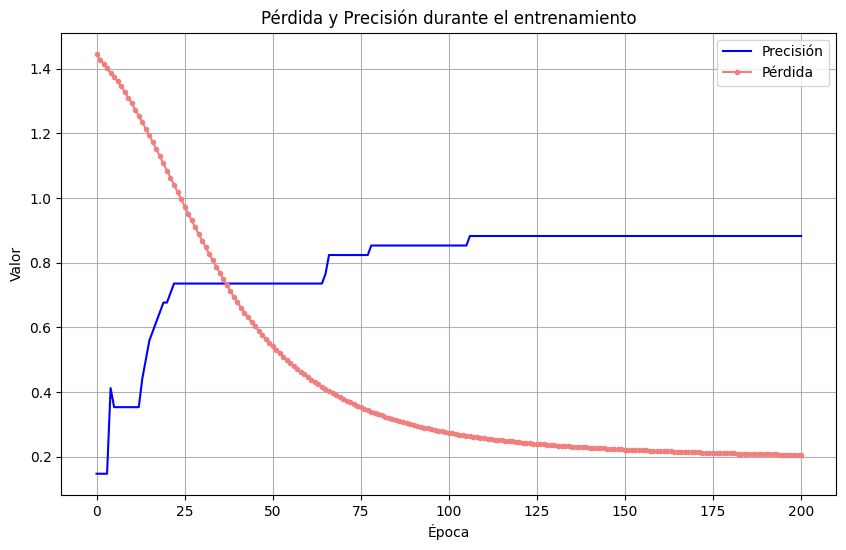

In [78]:
# Basado en los ejemplos vistos en clase acerca de gráficas

plt.figure(figsize=(10, 6))  # Figura para iniciar el gráfico

# Se grafica la precisión: se recorre la lista de tensores y se extraen sus valores numéricos
plt.plot(range(len(accuracies)), [a.item() for a in accuracies], color='blue', label='Precisión')

# Se grafica la pérdida: se recorre la lista de tensores y se extraen sus valores numéricos
plt.plot(range(len(losses)), [l.item() for l in losses], color='lightcoral', marker='.', label='Pérdida')

plt.title("Pérdida y Precisión durante el entrenamiento")
plt.xlabel("Época")
plt.ylabel('Valor')

plt.grid(True)
plt.legend()
plt.show()

2. Matrices de Confusión

  Análogamente a la precisión y pérdida, en las matrices de confusión de la primera y última época también se observa cómo el modelo mejora con el tiempo. Mientras que en la primera época realiza muchas predicciones incorrectas, especialmente en ciertas clases, en la última época muestra una mayor precisión, con menos errores y un rendimiento significativamente mejorado en la clasificación, que se ve reflejado en las siguientes matrices de confusión.

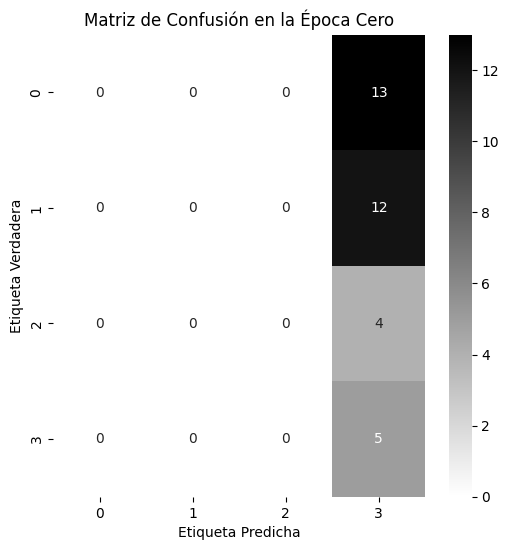

In [79]:
# prompt: Provide a base for a confusion matrix at any epoch

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Se calcula la matriz de confusión comparando las etiquetas verdaderas con las predichas en la época 0
first_epoch = confusion_matrix(data.y.cpu().numpy(), outputs[0].cpu().numpy())

plt.figure(figsize=(6, 6))  # Figura cuadrada para mostrar la matriz

# Mapa de calor a partir de la matriz de confusión
sns.heatmap(first_epoch, annot=True, fmt="d", cmap="binary")

plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.title("Matriz de Confusión en la Época Cero")
plt.show()

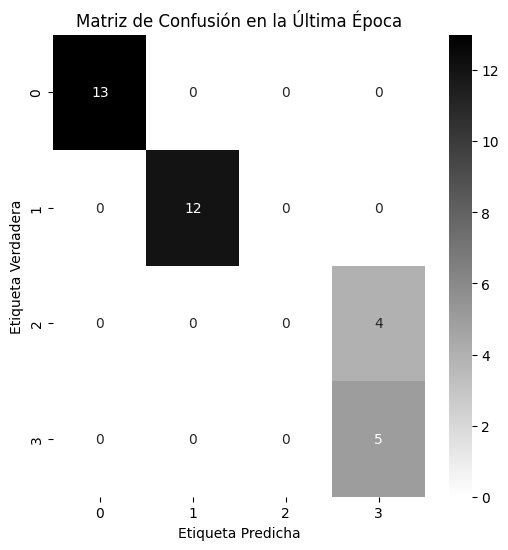

In [80]:
# Matriz de Confusión en la Última Época

final_epoch = confusion_matrix(data.y.cpu().numpy(), outputs[-1].cpu().numpy())
plt.figure(figsize=(6, 6))
sns.heatmap(final_epoch, annot=True, fmt="d", cmap="binary")

plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.title("Matriz de Confusión en la Última Época")
plt.show()

3. Visualización de las Clases mal Clasificadas en el Entrenamiento

La siguiente animación muestra cómo el modelo mejora su precisión a lo largo de las épocas, resaltando en rojo los nodos mal clasificados. Con el tiempo, se observa un aumento en la cantidad de nodos correctamente clasificados, representados en verde. Además, se incorporó un ajuste al tamaño de los nodos según su número de vecinos, lo que facilita la identificar a los nodos con mayor influencia en el grafo.

In [81]:
# Basado completamente en la animación que se encuentra en el repositorio más el apoyo de IA

%%capture
plt.rcParams["animation.bitrate"] = 3000  # Calidad del vídeo

def animate(i):
    # Convierte a un grafo de NetworkX
    G = to_networkx(data, to_undirected=True)

    # Se obtienen los grados de los nodos para usarlos como base del tamaño de cada nodo
    # prompt: provide a base on how to display a node size based on its degree
    degrees = [degree for node, degree in G.degree()]
    node_sizes = [degree * 100 for degree in degrees]

    # Se extraen las clases predichas en la época i y las clases verdaderas
    predicted_classes = outputs[i]
    true_classes = data.y

    # Lista de colores dependiendo de si la predicción fue correcta o no
    # prompt: give a color based on its prediction
    node_colors = ['#FF7F7F' if pred != true else '#90EE90' for pred, true in zip(predicted_classes, true_classes)]

    # Se dibuja el grafo con los tamaños y colores definidos
    nx.draw_networkx(G,
                     pos=nx.spring_layout(G, seed=0),
                     with_labels=True,
                     node_size=node_sizes,
                     node_color=node_colors,
                     width=0.8,
                     edge_color="grey",
                     font_size=14
                     )

    # Se muestra las métricas para las épocas correspondientes
    plt.title(f'Época {i} | Pérdida: {losses[i]:.2f} | Precisión: {accuracies[i]*100:.2f}%',
              fontsize=18, pad=20)

# Figura para contener la animación
fig = plt.figure(figsize=(8, 8))
plt.axis('off')

# Se define la animación
anim = animation.FuncAnimation(fig, animate, \
            np.arange(0, 200, 10), interval=500, repeat=True)

# Se convierte la animación a HTML5 para poder verla
html = HTML(anim.to_html5_video())

In [82]:
display(html)